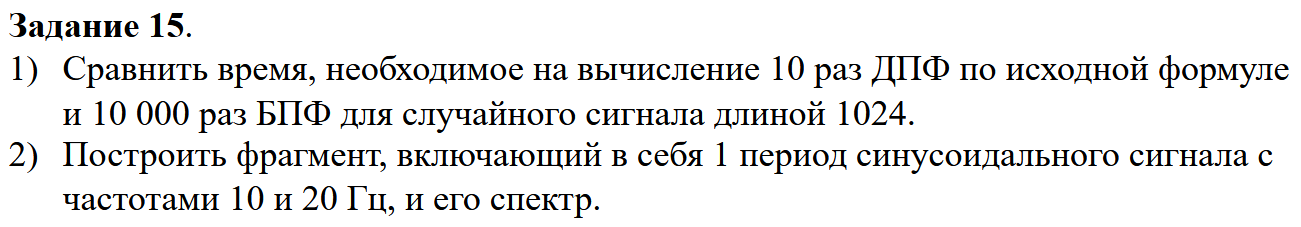

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [14]:
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=np.complex128)
    for n in range(N):
        for k in range(N):
            X[n] += x[k] * np.exp(-2j * np.pi * n * k / N)
    return X

In [15]:
x = np.random.rand(1024)

In [16]:
start_time_dft = time.time()
for i in range(10):
    dft(x)
end_time_dft = time.time()

start_time_fft = time.time()
for i in range(10000):
    np.fft.fft(x)
end_time_fft = time.time()

speedup = (end_time_dft - start_time_dft) / (end_time_fft - start_time_fft)

print(f"Время выполнения ДПФ: {end_time_dft - start_time_dft:.4f} секунд")
print(f"Время выполнения БПФ: {end_time_fft - start_time_fft:.4f} секунд")
print(f"БПФ быстрее в {speedup:.2f} раз")

Время выполнения ДПФ: 15.4418 секунд
Время выполнения БПФ: 0.1666 секунд
БПФ быстрее в 92.67 раз


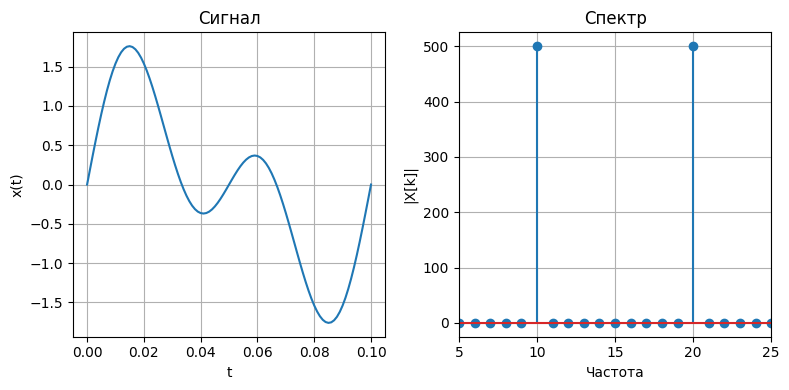

In [17]:
t = np.arange(0, 1, 1/1000)
x = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 20 * t)
X = np.fft.fft(x)
freq = np.fft.fftfreq(len(x), d=1/1000)

plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.plot(t[:101], x[:101])
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Сигнал')
plt.grid()

plt.subplot(122)
plt.stem(freq[:len(freq)//2], np.abs(X[:len(X)//2]))
plt.xlabel('Частота')
plt.ylabel('|X[k]|')
plt.title('Спектр')
plt.xlim(5, 25)
plt.grid()

plt.tight_layout()
plt.show()

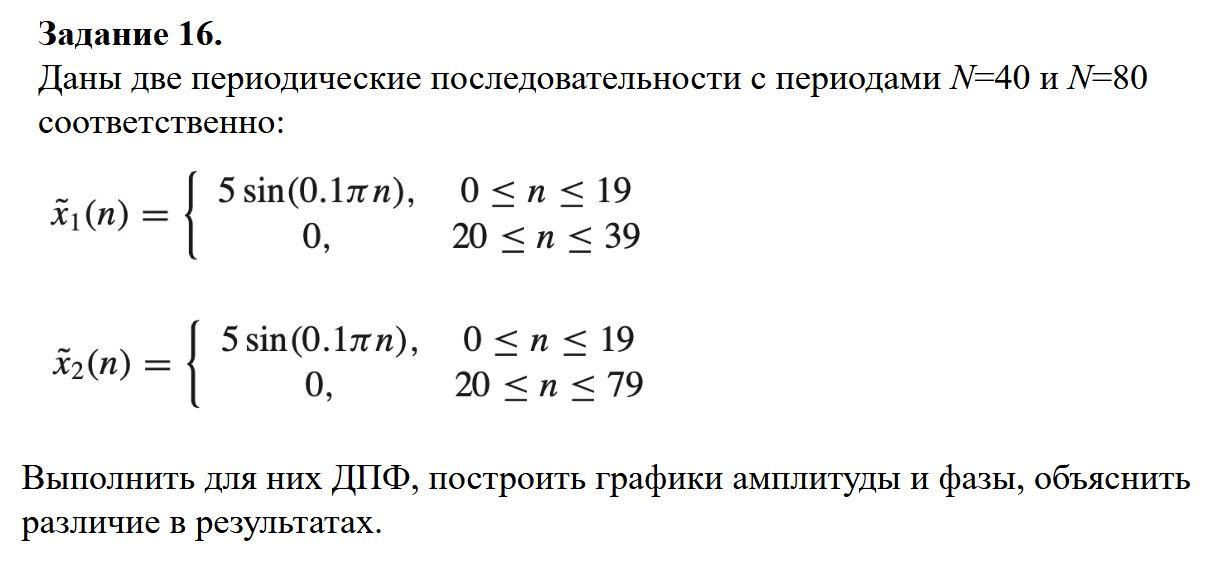

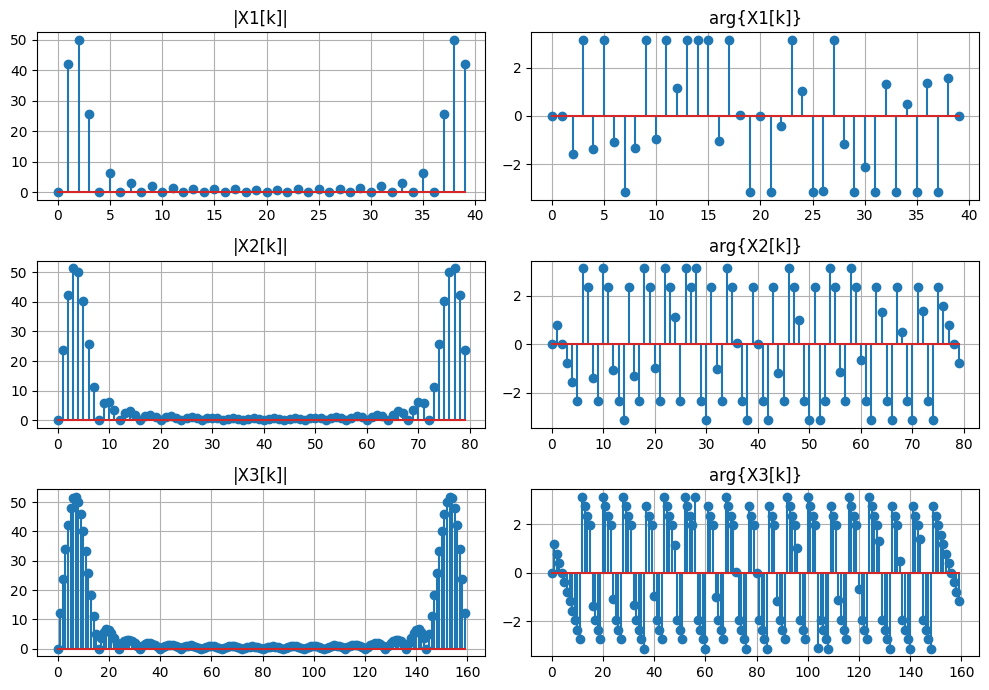

In [18]:
N1 = 40
N2 = 80
N3 = 160

x1 = np.zeros(N1)
x2 = np.zeros(N2)
x3 = np.zeros(N3)

for n in range(20):
    x1[n] = 5 * np.sin(0.1 * np.pi * n)
    x2[n] = 5 * np.sin(0.1 * np.pi * n)
    x3[n] = 5 * np.sin(0.1 * np.pi * n)

X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)
X3 = np.fft.fft(x3)

amplitudes = [np.abs(X1), np.abs(X2), np.abs(X3)]
phases = [np.angle(X1), np.angle(X2), np.angle(X3)]

plt.figure(figsize=(10, 7))

for i in range(3):
    plt.subplot(3, 2, 2*i + 1)
    plt.stem(amplitudes[i])
    plt.title(f'|X{i+1}[k]|')
    plt.grid()

    plt.subplot(3, 2, 2*i + 2)
    plt.stem(phases[i])
    plt.title(f'arg{{X{i+1}[k]}}')
    plt.grid()

plt.tight_layout()
plt.show()

Различие заключается в частотном разрешении. Чем больше N, тем выше частотное разрешение ДПФ. Это означает, что ДПФ может более точно различать близкие по частоте компоненты сигнала

В общем, чем больше N, тем лучше ДПФ аппроксимирует истинный спектр сигнала

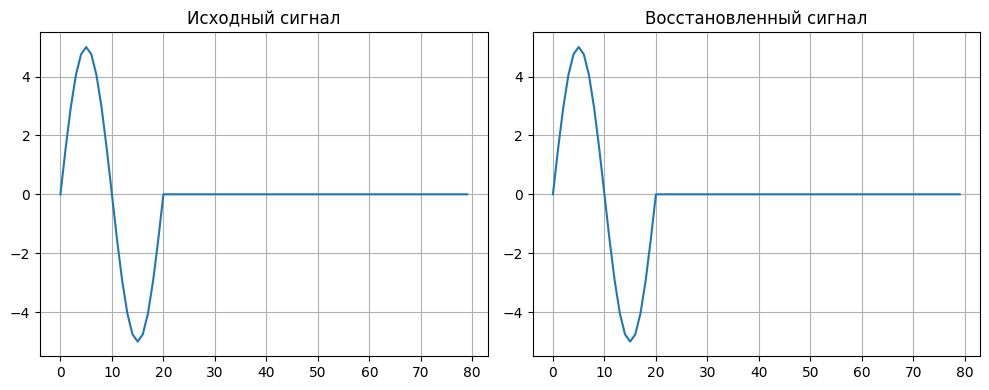

In [21]:
x2_reconstructed = np.fft.ifft(X2)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x2)
plt.title('Исходный сигнал')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(np.real(x2_reconstructed))
plt.title('Восстановленный сигнал')
plt.grid()

plt.tight_layout()
plt.show()